In [1]:
import pandas as pd
from matplotlib  import pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error
df = pd.read_csv('../Data/BacNinh.csv')
df['date'] = pd.to_datetime(df['date'])


# Split the dataset into training and test sets
#train_df = df[(df['date'] >= '2019-03-01') & (df['date'] <= '2024-03-01')]
#test_df = df[df['date'] > '2024-03-01']
train_df = df[:int(0.8*len(df))]
test_df = df[int(0.8*len(df)):]
train_df

,Unnamed: 0,date,pm25,pm10,o3,no2,so2,co,AQI
0,1,2020-06-20,66,21,35,9,3,3,66
1,2,2020-06-21,25,18,32,9,3,2,32
2,3,2020-06-22,22,24,95,9,5,2,95
3,4,2020-06-23,25,30,34,9,6,3,34
4,5,2020-06-24,32,38,21,9,5,4,38
...,...,...,...,...,...,...,...,...,...
947,948,2023-07-12,1,40,37,9,1,1,40
948,949,2023-07-13,1,1,23,10,1,1,23
949,950,2023-07-14,1,1,27,10,1,2,27
950,951,2023-07-15,1,1,33,10,2,2,33


In [2]:
model = SimpleExpSmoothing(np.asarray(train_df["AQI"]))
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_ses = test_df.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test_df))
y_hat_ses

{'smoothing_level': 0.9898354697897368, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 66.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


,Unnamed: 0,date,pm25,pm10,o3,no2,so2,co,AQI,ses_forecast
952,953,2023-07-17,67,40,20,27,1,2,67,46.857073
953,954,2023-07-18,58,37,14,34,1,3,58,46.857073
954,955,2023-07-19,60,43,6,34,1,3,60,46.857073
955,956,2023-07-20,71,45,7,32,1,3,71,46.857073
956,957,2023-07-21,69,47,11,27,1,2,69,46.857073
...,...,...,...,...,...,...,...,...,...,...
1185,1186,2024-03-21,96,47,29,11,3,2,96,46.857073
1186,1187,2024-03-22,67,35,18,6,3,2,67,46.857073
1187,1188,2024-03-23,48,52,12,7,4,1,52,46.857073
1188,1189,2024-03-24,89,56,23,7,9,1,89,46.857073


In [3]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_df['AQI'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_df['AQI']-y_hat_ses['ses_forecast'])/test_df['AQI'])*100,2)

results = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,67.0,46.2


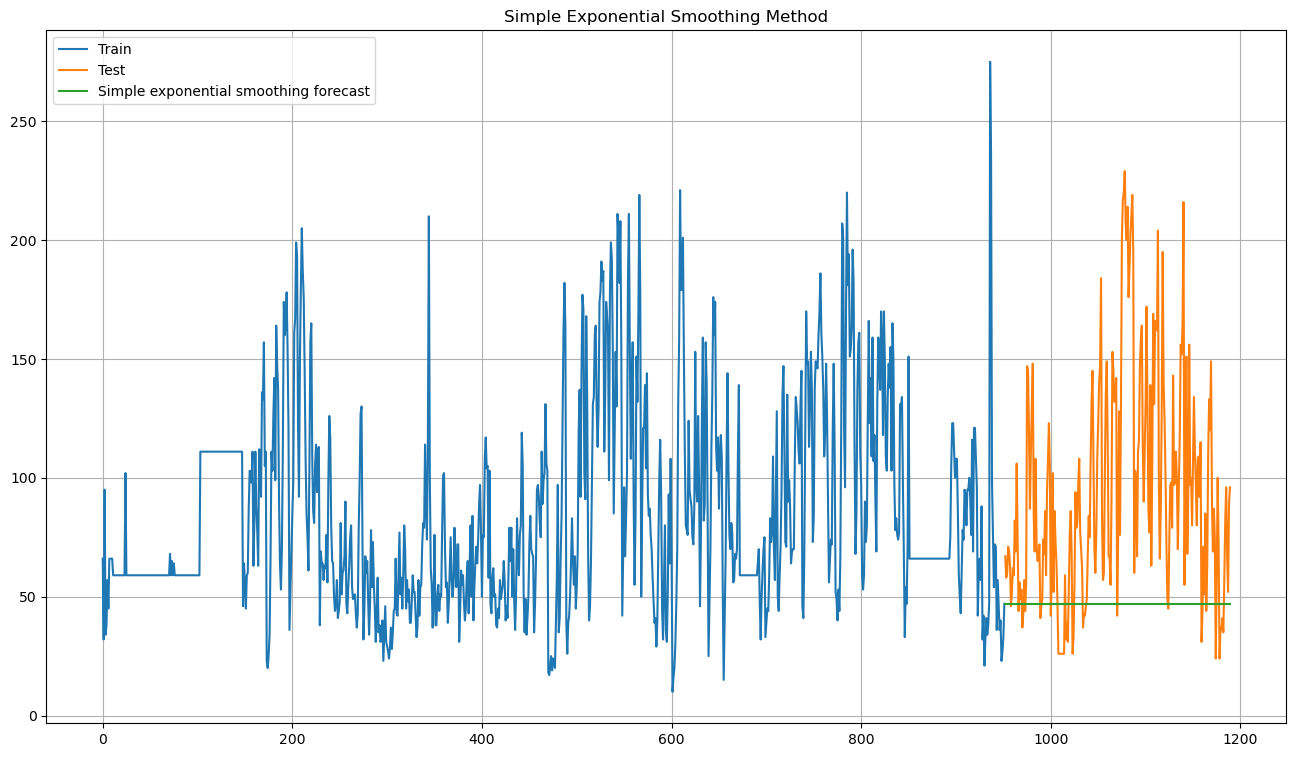

In [4]:
plt.figure(figsize=(16,9))
plt.grid()
plt.plot(train_df["AQI"], label='Train')
plt.plot(test_df["AQI"], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()